UPLOADING DATASET

In [1]:
import pandas as pd

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
irisdata = pd.DataFrame(iris.data)
irisdata

LABELLING COLUMNS AND TARGET ATTRIBUTES

In [4]:
irisdata = irisdata.rename(columns={0: "Sepal_length", 1: "Sepal_width", 2: "Petal_length", 3: "Petal_length"})

In [ ]:
iristarget = pd.DataFrame(iris.target)
iristarget.columns = ['class_labels']
iristarget

In [6]:
iristarget = iristarget.replace([0,1,2], ["iris-setosa", "iris-versicolor", "iris-viginica"])
iristarget

,class_labels
0,iris-setosa
1,iris-setosa
2,iris-setosa
3,iris-setosa
4,iris-setosa
...,...
145,iris-viginica
146,iris-viginica
147,iris-viginica
148,iris-viginica


In [7]:
finaldata = pd.concat([irisdata, iristarget], axis=1)
finaldata

,Sepal_length,Sepal_width,Petal_length,Petal_length,class_labels
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris-viginica
146,6.3,2.5,5.0,1.9,iris-viginica
147,6.5,3.0,5.2,2.0,iris-viginica
148,6.2,3.4,5.4,2.3,iris-viginica


DATA VISUALIZATION

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

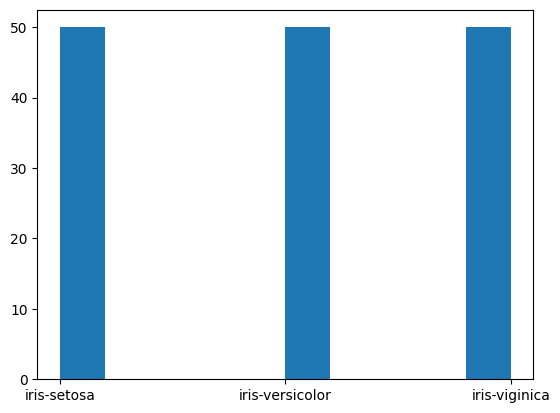

In [8]:
import matplotlib.pyplot as plt
plt.hist(finaldata['class_labels'])

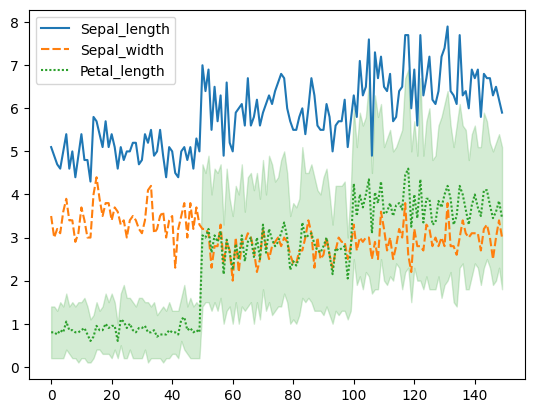

In [9]:
import seaborn as sns
sns.lineplot(data=finaldata.drop(['class_labels'], axis=1))
plt.show()

TRAIN-TEST DATA SPLITTING

In [10]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(irisdata, iristarget, test_size = 0.3, random_state = 42)

APPLY DECISION TREE ALGORITHM

In [11]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [12]:
ypred = classifier.predict(xtest)
ypred

array(['iris-versicolor', 'iris-setosa', 'iris-viginica',
       'iris-versicolor', 'iris-versicolor', 'iris-setosa',
       'iris-versicolor', 'iris-viginica', 'iris-versicolor',
       'iris-versicolor', 'iris-viginica', 'iris-setosa', 'iris-setosa',
       'iris-setosa', 'iris-setosa', 'iris-versicolor', 'iris-viginica',
       'iris-versicolor', 'iris-versicolor', 'iris-viginica',
       'iris-setosa', 'iris-viginica', 'iris-setosa', 'iris-viginica',
       'iris-viginica', 'iris-viginica', 'iris-viginica', 'iris-viginica',
       'iris-setosa', 'iris-setosa', 'iris-setosa', 'iris-setosa',
       'iris-versicolor', 'iris-setosa', 'iris-setosa', 'iris-viginica',
       'iris-versicolor', 'iris-setosa', 'iris-setosa', 'iris-setosa',
       'iris-viginica', 'iris-versicolor', 'iris-versicolor',
       'iris-setosa', 'iris-setosa'], dtype=object)

EVALUATION AND CHECKING ACCURACY

In [13]:
from sklearn import metrics
acc = metrics.accuracy_score(ypred, ytest)
print(f'The accuracy score is {acc}')

The accuracy score is 1.0


SAVING THE MODEL AND TESTING WITH RANDOM SAMPLE

In [14]:
import pickle as pk
filename = 'model.sav'
pk.dump(classifier, open(filename, 'wb'))

In [15]:
import numpy as np
new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#X = np.array([[3, 2, 1, 0.2]])

In [16]:
loaded_model = pk.load(open(filename, 'rb'))
result = loaded_model.predict(new)
print(result)

['iris-setosa' 'iris-versicolor' 'iris-viginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
